In [1]:
#import skimage io
from skimage import io as skio
#image url
url = 'http://i.stack.imgur.com/SYxmp.jpg'
#reading image
img = skio.imread(url)

In [2]:
#
print("shape of image: {}".format(img.shape))
#dtype : Data Type of image
print("dtype of image: {}".format(img.dtype))

shape of image: (1100, 762)
dtype of image: uint8


In [4]:
#To detect edges, we will use sobel filters
from skimage import filters
sobel = filters.sobel(img)

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'
plt.rcParams['figure.dpi'] = 200

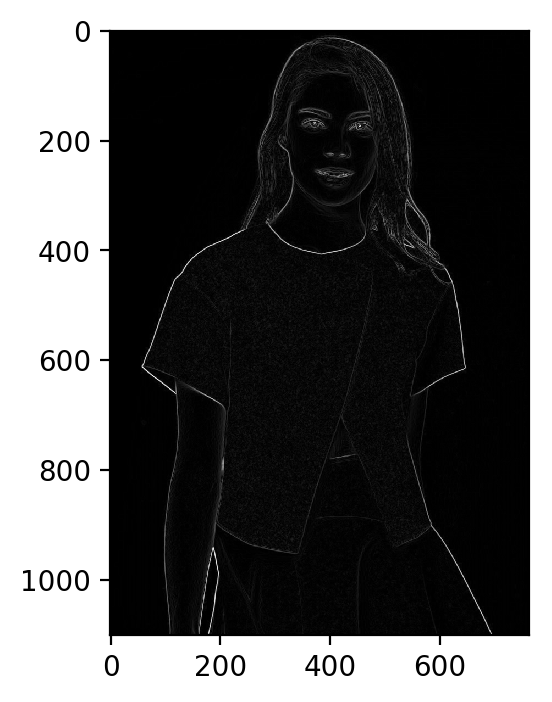

In [6]:
plt.imshow(sobel)

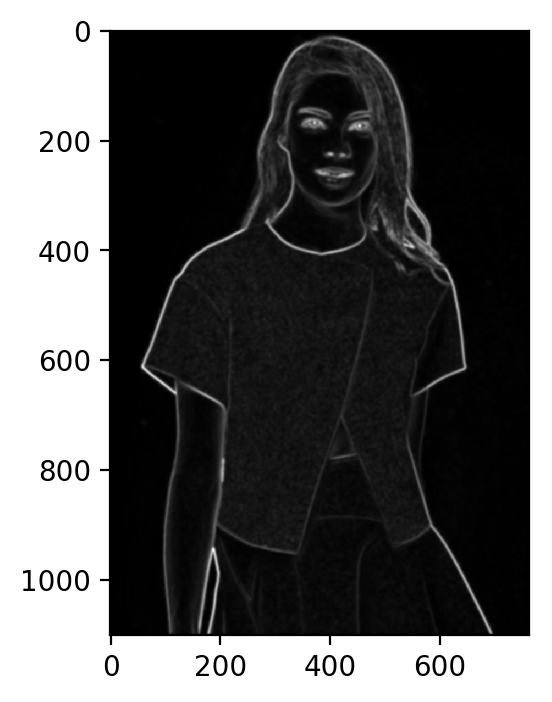

In [7]:
#Let's now blur this image a bit to make the edges thicker:
blurred = filters.gaussian(sobel, sigma=2.0)
plt.imshow(blurred)

In [14]:
#To perform watershed transform, we use simple method called 'dark and light zones'
import numpy as np
light_spots = np.array((img > 245).nonzero()).T

In [15]:
light_spots.shape


(1432, 2)

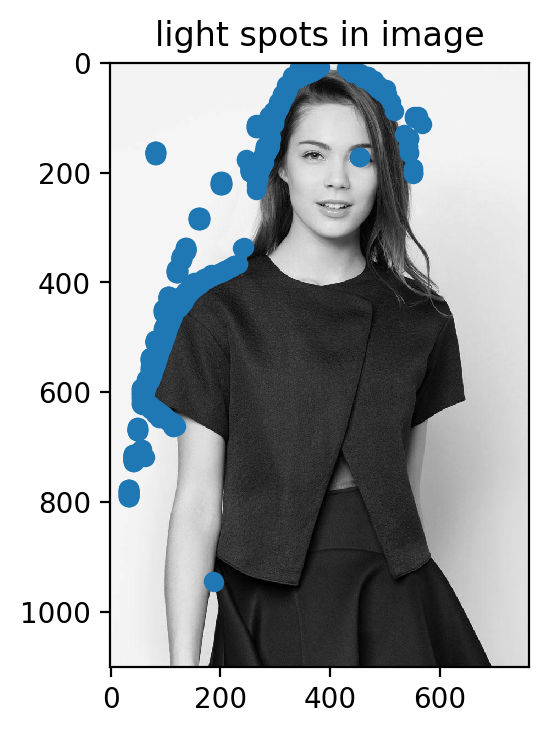

In [16]:
plt.plot(light_spots[:, 1], light_spots[:, 0], 'o')
plt.imshow(img)
plt.title('light spots in image')

In [17]:
dark_spots = np.array((img < 3).nonzero()).T


In [18]:
dark_spots.shape


(1402, 2)

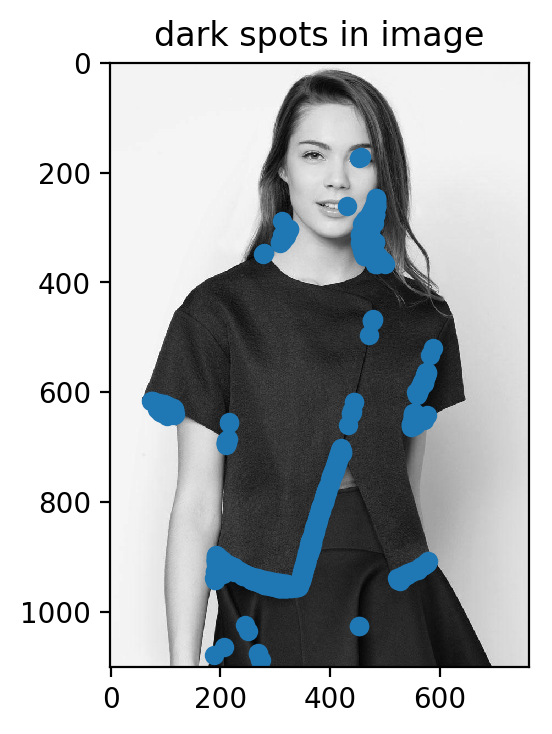

In [19]:
plt.plot(dark_spots[:, 1], dark_spots[:, 0], 'o')
plt.imshow(img)
plt.title('dark spots in image')

In [20]:
# we can use the labelling function from scipy.ndimage to make a seed mask:
from scipy import ndimage as ndi
bool_mask = np.zeros(img.shape, dtype=np.bool)
bool_mask[tuple(light_spots.T)] = True
bool_mask[tuple(dark_spots.T)] = True
seed_mask, num_seeds = ndi.label(bool_mask)
num_seeds

672

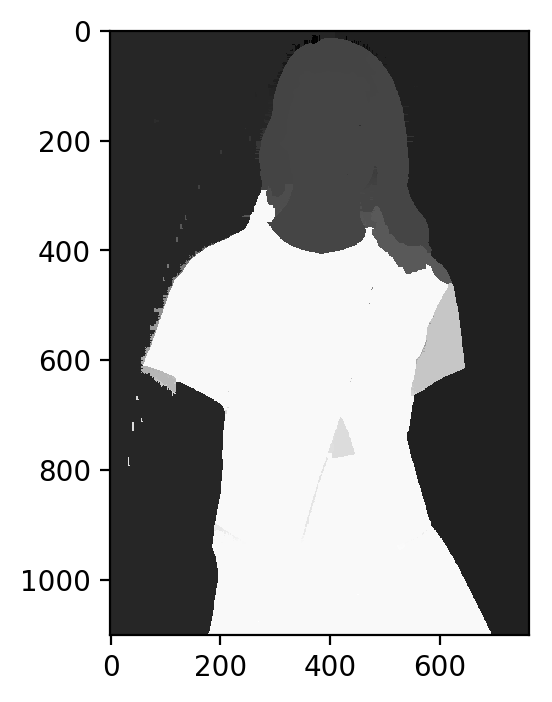

In [21]:
#Applying watershed
from skimage import morphology
ws = morphology.watershed(blurred, seed_mask)
plt.imshow(ws)

In [22]:
#This looks pretty nice. However, we have several classes here. Ideally, 
#we want to remove the background, which would be the class with the most pixels in the image. Let's do that.
background = max(set(ws.ravel()), key=lambda g: np.sum(ws == g))
background

656

In [23]:

background_mask = (ws == background)

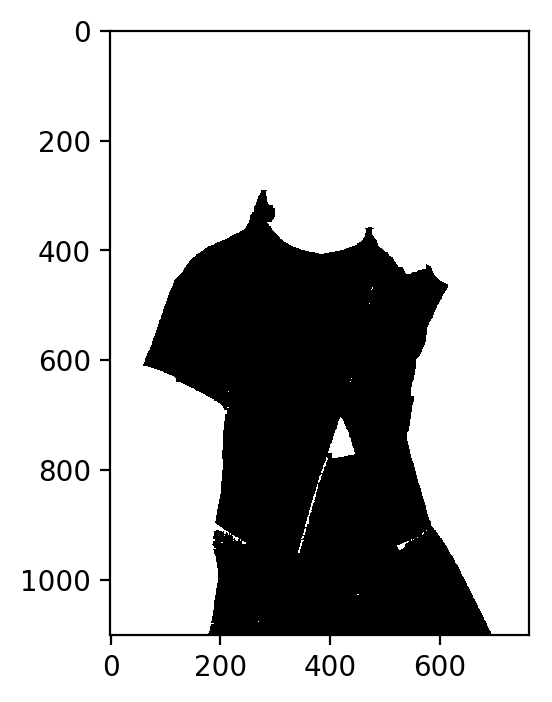

In [24]:
plt.imshow(~background_mask)


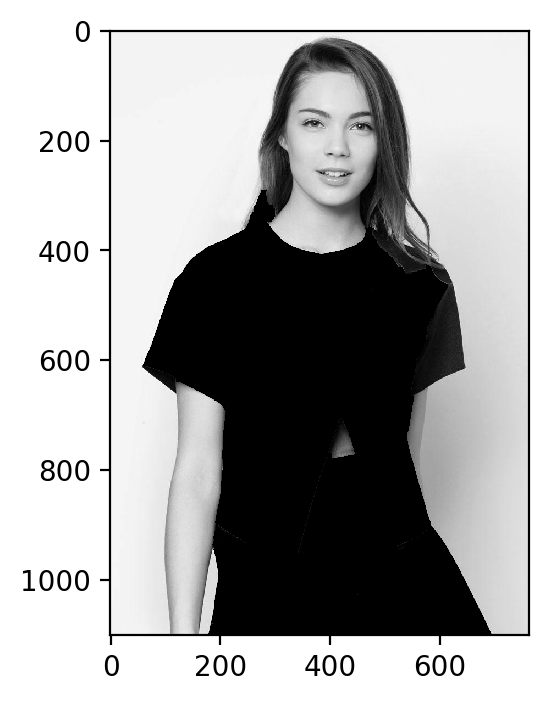

In [25]:
cleaned = img * ~background_mask
plt.imshow(cleaned)